In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join

In [2]:
mypath= "."
csvfiles = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and f[-4:]==".csv")]
csvfiles

['Aleks2_results.csv',
 'Aleks_results.csv',
 'CPU_results (1).csv',
 'Dani_Macbook_results.csv',
 'Dani_results.csv',
 'T4 GPU_results (1).csv']

In [3]:
df = None

for csvfile in csvfiles:
    new_df = pd.read_csv(csvfile)
    print(f"{csvfile}:\t{len(new_df)}")

    if df is None:
        df = new_df
    else:
        df = pd.concat([df, new_df], ignore_index=True)

    print(len(df))

df

Aleks2_results.csv:	1613
1613
Aleks_results.csv:	843
2456
CPU_results (1).csv:	88
2544
Dani_Macbook_results.csv:	842
3386
Dani_results.csv:	2400
5786
T4 GPU_results (1).csv:	155
5941


,Unnamed: 0,model,batch_size,epochs,dataset_size,time_to_train,time_to_retrain,time_to_predict,accuracy,name
0,0,RNN,128,1,15000,2.952457,0.783139,0.932045,0.6436,Aleks2
1,1,FNN,128,1,15000,1.606068,0.903214,0.477152,0.8656,Aleks2
2,2,CNN,128,1,15000,2.090442,1.190924,0.500040,0.9352,Aleks2
3,3,RNN,128,1,15600,2.567901,0.670870,0.736587,0.7505,Aleks2
4,4,FNN,128,1,15600,1.853802,0.984637,0.822216,0.8853,Aleks2
...,...,...,...,...,...,...,...,...,...,...
5936,150,RNN,128,1,45000,12.838315,2.099783,2.688983,0.8928,T4 GPU
5937,151,FNN,128,1,45000,5.718172,2.855448,0.894842,0.9016,T4 GPU
5938,152,CNN,128,1,45000,6.574182,2.906103,1.009092,0.9663,T4 GPU
5939,153,RNN,128,1,45600,8.558773,1.829297,2.180620,0.8968,T4 GPU


In [46]:
def filter_df_by_column_std(df, column):
    filtered_df = None
    for name in df.name.unique():
        for model in df.model.unique():
            tdf = df[(df.name == name) & (df.model == model)]
            std = tdf[column].std()
            mean = tdf[column].mean()
        
            upper_bound = mean + (1.5*std)
            lower_bound = mean - (1.5*std)
        
            fdf = tdf[(lower_bound <= tdf[column]) & (tdf[column] <= upper_bound)]

            if filtered_df is None:
                filtered_df = fdf.copy()
            else:
                filtered_df = pd.concat([filtered_df, fdf], ignore_index=True)
                
    return filtered_df

In [47]:
filtered_df = filter_df_by_column_std(df, "time_to_train")
filtered_df = filter_df_by_column_std(filtered_df, "time_to_retrain")
filtered_df = filter_df_by_column_std(filtered_df, "time_to_predict")

In [60]:
filtered_df.columns

Index(['Unnamed: 0', 'model', 'batch_size', 'epochs', 'dataset_size',
       'time_to_train', 'time_to_retrain', 'time_to_predict', 'accuracy',
       'name'],
      dtype='object')

(array([1203.,  960.,  960.,  725.,  480.,  480.,  413.,  240.,  240.,
         240.]),
 array([   0. ,  239.9,  479.8,  719.7,  959.6, 1199.5, 1439.4, 1679.3,
        1919.2, 2159.1, 2399. ]),
 <BarContainer object of 10 artists>)

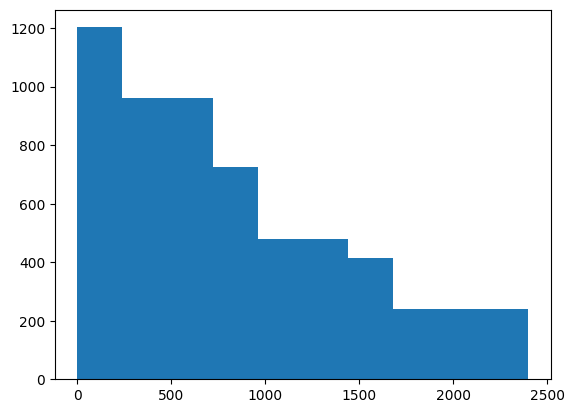

In [61]:
plt.hist(df['Unnamed: 0'])

(array([636., 552., 636., 552., 636., 527., 584., 482., 538., 798.]),
 array([15000., 19500., 24000., 28500., 33000., 37500., 42000., 46500.,
        51000., 55500., 60000.]),
 <BarContainer object of 10 artists>)

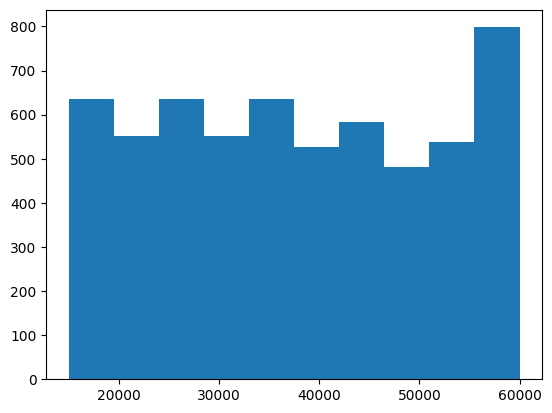

In [62]:
plt.hist(df.dataset_size)

43.0998375415802


(array([2859., 1322.,  282.,   69.,   69.,   49.,   20.,    8.,    3.,
           7.]),
 array([ 1.46698642,  5.63027153,  9.79355664, 13.95684175, 18.12012687,
        22.28341198, 26.44669709, 30.6099822 , 34.77326732, 38.93655243,
        43.09983754]),
 <BarContainer object of 10 artists>)

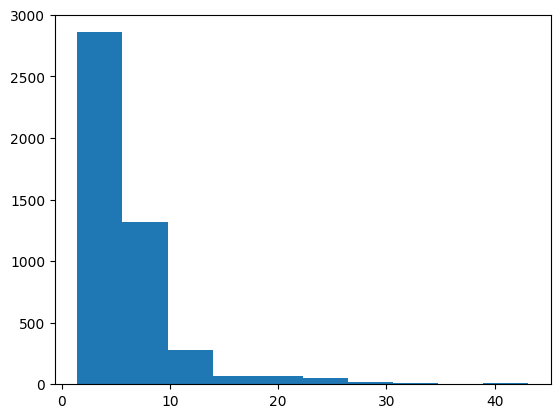

In [48]:
print(filtered_df["time_to_train"].max())
plt.hist(filtered_df["time_to_train"])

(array([4.103e+03, 4.030e+02, 8.800e+01, 5.000e+01, 2.300e+01, 6.000e+00,
        1.300e+01, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.5873611 ,  7.14280839, 13.69825568, 20.25370297, 26.80915027,
        33.36459756, 39.92004485, 46.47549214, 53.03093944, 59.58638673,
        66.14183402]),
 <BarContainer object of 10 artists>)

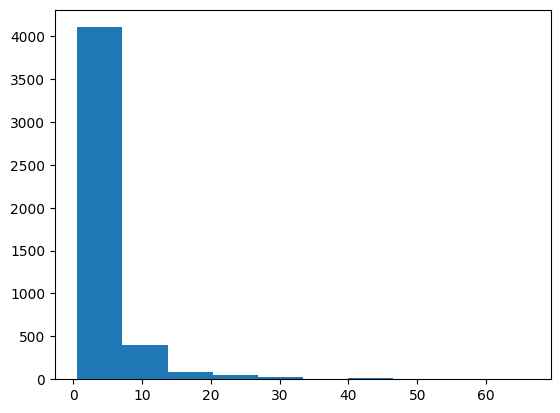

In [49]:
plt.hist(filtered_df["time_to_retrain"])

(array([1342., 1762.,  959.,  248.,  167.,   56.,  125.,    7.,    8.,
          14.]),
 array([0.3688004 , 0.73946726, 1.11013412, 1.48080099, 1.85146785,
        2.22213471, 2.59280157, 2.96346843, 3.33413529, 3.70480216,
        4.07546902]),
 <BarContainer object of 10 artists>)

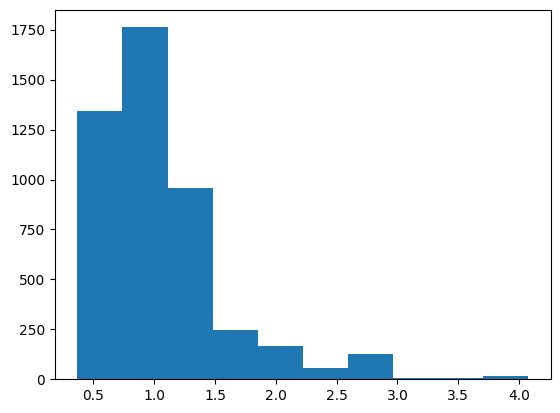

In [50]:
plt.hist(filtered_df["time_to_predict"])

In [51]:
def plot_by_col(x_col, y_col, c_col):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    handels = []
    labels = []
    
    for value in filtered_df[c_col].unique():
        dft = filtered_df[filtered_df[c_col] == value]
        handels.append(ax1.scatter(dft[x_col], dft[y_col]))
        labels.append(value)
    
    ax1.legend(handles=handels, labels=labels)
    fig.suptitle(f"{y_col} vs {x_col}")

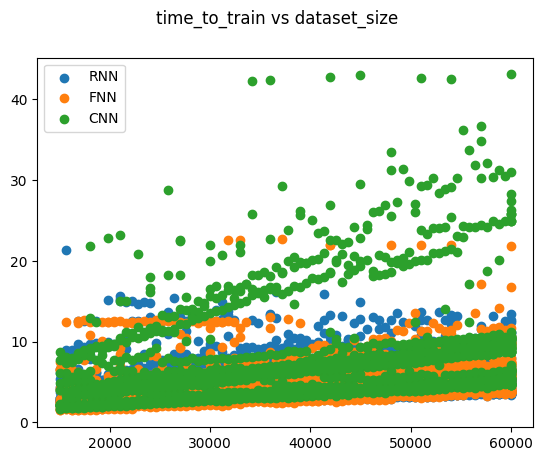

In [52]:
plot_by_col("dataset_size", "time_to_train", "model")

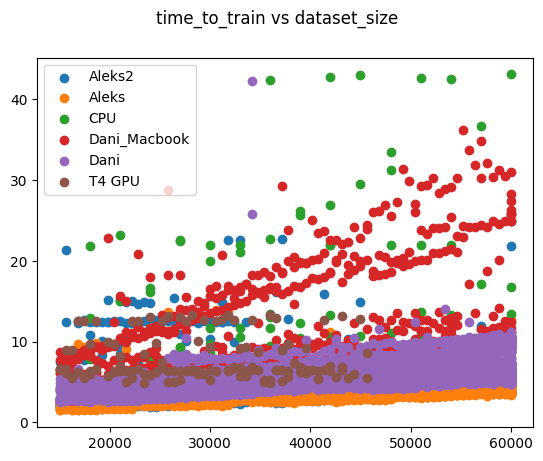

In [53]:
plot_by_col("dataset_size", "time_to_train", "name")

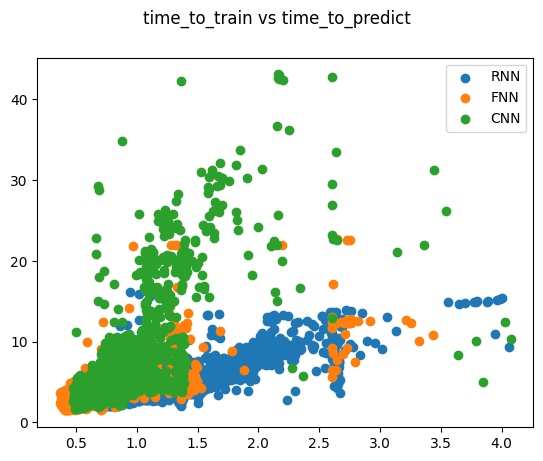

In [54]:
plot_by_col("time_to_predict", "time_to_train", "model")

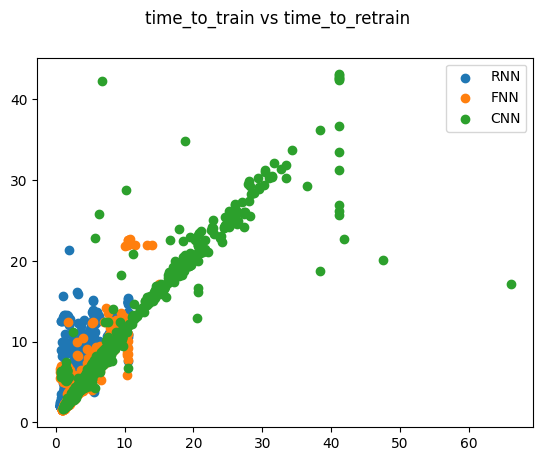

In [55]:
plot_by_col("time_to_retrain", "time_to_train", "model")

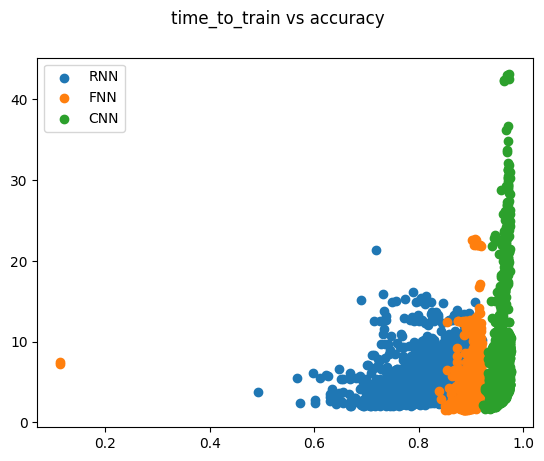

In [56]:
plot_by_col("accuracy", "time_to_train", "model")

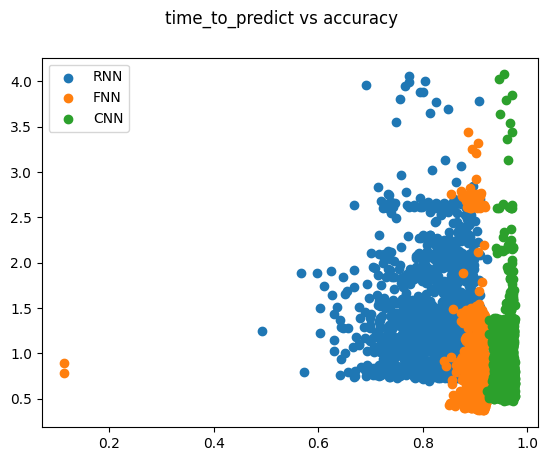

In [57]:
plot_by_col("accuracy", "time_to_predict", "model")

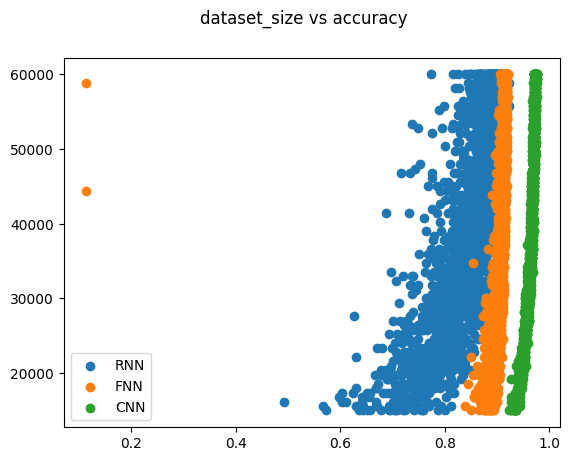

In [58]:
plot_by_col("accuracy", "dataset_size", "model")